# Part 1 Regression (Peer-to-Peer Dress Rental Prices)

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('dress_rental_prices.csv',index_col=0)

print(df.head())
print(df.info())
print(df.describe())

      ID                        Name             Brand Colour Catagories  \
0  74416         Runway stripe dress  Stella McCartney  beige    dresses   
1  73815  Reformation Kourtney Dress       Reformation  beige    dresses   
2  73801    Ivory Viola bridal dress             Ghost  beige    dresses   
3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige    dresses   
4  73605                       Ellen              RIXO  beige    dresses   

   Price  
0    111  
1     50  
2     75  
3     37  
4     47  
<class 'pandas.core.frame.DataFrame'>
Index: 29997 entries, 0 to 29996
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          29997 non-null  int64 
 1   Name        29995 non-null  object
 2   Brand       29997 non-null  object
 3   Colour      29997 non-null  object
 4   Catagories  29883 non-null  object
 5   Price       29997 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB
None

In [15]:
df = df.drop(['ID', 'Name'], axis=1)

df['Catagories'].fillna('Unknown', inplace=True)

df = pd.get_dummies(df, columns=['Brand', 'Colour', 'Catagories'])

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │       1,626,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,393 (6.33 MB)

 Trainable params: 1,659,393 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1855.8947 - val_loss: 887.2972
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 927.3125 - val_loss: 1174.9833
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 769.4992 - val_loss: 1152.9764
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 754.0305 - val_loss: 1176.0863
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 711.2920 - val_loss: 1205.8495
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 765.3839 - val_loss: 1184.1738


In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Squared Error: 918.6812501982578


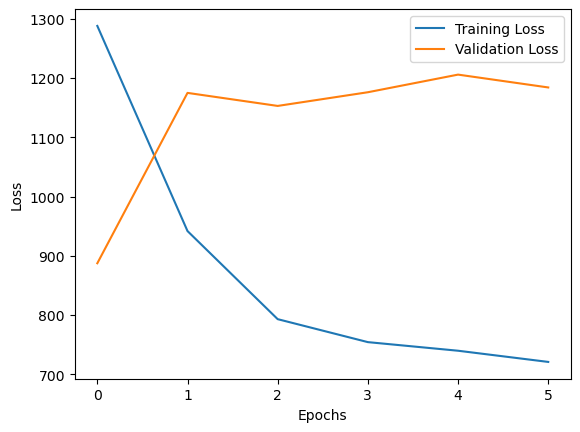

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Part 2 Classification (Bike Sales dataset)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Bike Sales Dashboard.xlsx")
print(df.head())

      ID Martial Status  Gender  Income  Children        Education  \
0  12496        Married  Female   40000         1        Bachelors   
1  24107        Married    Male   30000         3  Partial College   
2  14177        Married    Male   80000         5  Partial College   
3  24381         Single    Male   70000         0        Bachelors   
4  25597         Single    Male   30000         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Age Brackets Purchased Bike  
0   Middle Age             No  
1   Middle Age             No  
2          Old             No  
3   Middle Age            Yes  
4   

In [4]:
df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


In [6]:
print(df.info())

print(df.isnull().sum())

print(df.describe())

print(df['Purchased Bike'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Martial Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Age Brackets      1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB
None
ID                  0
Martial Status      0
Gender              0
Income              0
Children     

In [10]:
df_encoded = pd.get_dummies(df, columns=[
    'Martial Status', 'Gender', 'Education', 'Occupation',
    'Home Owner', 'Commute Distance', 'Region', 'Age Brackets'
])

label_encoder = LabelEncoder()
df_encoded['Purchased Bike'] = label_encoder.fit_transform(df_encoded['Purchased Bike'])

In [12]:
df_encoded

,Income,Children,Cars,Age,Purchased Bike,Martial Status_Married,Martial Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Commute Distance_1-2 Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Commute Distance_More than 10 Miles,Region_Europe,Region_North America,Region_Pacific,Age Brackets_Adolescent,Age Brackets_Middle Age,Age Brackets_Old
0,40000,1,0,42,0,True,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False
1,30000,3,1,43,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,80000,5,2,60,0,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,70000,0,1,41,1,False,True,False,True,True,...,False,False,True,False,False,False,True,False,True,False
4,30000,0,0,36,1,False,True,False,True,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,2,2,54,1,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
996,70000,4,0,35,1,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
997,60000,2,0,38,1,True,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
998,100000,3,3,38,0,False,True,False,True,True,...,True,False,False,False,False,True,False,False,True,False


In [13]:
X = df_encoded.drop('Purchased Bike', axis=1)
y = df_encoded['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 70.50%
              precision    recall  f1-score   support

          No       0.72      0.74      0.73       106
         Yes       0.69      0.67      0.68        94

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



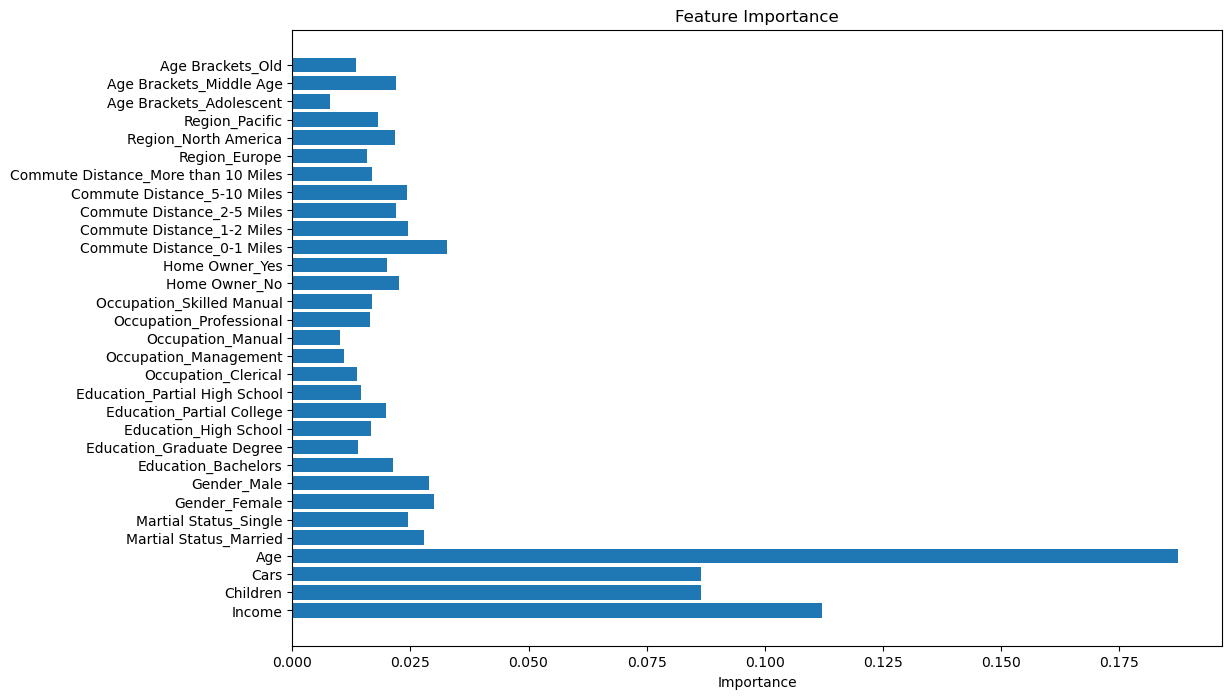

In [16]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [18]:
print(feature_names,importances)

Index(['Income', 'Children', 'Cars', 'Age', 'Martial Status_Married',
       'Martial Status_Single', 'Gender_Female', 'Gender_Male',
       'Education_Bachelors', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_No', 'Home Owner_Yes',
       'Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Commute Distance_More than 10 Miles', 'Region_Europe',
       'Region_North America', 'Region_Pacific', 'Age Brackets_Adolescent',
       'Age Brackets_Middle Age', 'Age Brackets_Old'],
      dtype='object') [0.11205086 0.08655907 0.0864941  0.18740227 0.02780414 0.02448479
 0.02991702 0.02898509 0.02140276 0.01393935 0.01661363 0.01977783
 0.01452931 0.01367456 0.01100793 0.01003775 0.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with the best parameters
best_rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with best parameters: {accuracy_best * 100:.2f}%')
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Accuracy with best parameters: 71.50%
              precision    recall  f1-score   support

          No       0.72      0.75      0.73       106
         Yes       0.70      0.68      0.69        94

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [22]:
import pandas as pd

# Set a threshold for feature importance
threshold = 0.01  # Example threshold value

# Create a DataFrame to map feature names and their importance
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Filter features based on the threshold
important_features = feature_importances[feature_importances['Importance'] > threshold]

print("Features with importance above the threshold:")
print(important_features)


Features with importance above the threshold:
                                Feature  Importance
0                                Income    0.112051
1                              Children    0.086559
2                                  Cars    0.086494
3                                   Age    0.187402
4                Martial Status_Married    0.027804
5                 Martial Status_Single    0.024485
6                         Gender_Female    0.029917
7                           Gender_Male    0.028985
8                   Education_Bachelors    0.021403
9             Education_Graduate Degree    0.013939
10                Education_High School    0.016614
11            Education_Partial College    0.019778
12        Education_Partial High School    0.014529
13                  Occupation_Clerical    0.013675
14                Occupation_Management    0.011008
15                    Occupation_Manual    0.010038
16              Occupation_Professional    0.016373
17            Occu

In [24]:
# Select important feature names
selected_features = important_features['Feature'].tolist()

# Update the dataset to include only important features
X_important = pd.DataFrame(X, columns=feature_names)[selected_features]

# Split the updated data
X_train_important, X_test_important, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Retrain the model with the important features
best_rf_model.fit(X_train_important, y_train)

# Make predictions and evaluate the model
y_pred_important = best_rf_model.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)

print(f'Accuracy with important features: {accuracy_important * 100:.2f}%')
print(classification_report(y_test, y_pred_important, target_names=label_encoder.classes_))


Accuracy with important features: 73.50%
              precision    recall  f1-score   support

          No       0.74      0.76      0.75       106
         Yes       0.73      0.70      0.71        94

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



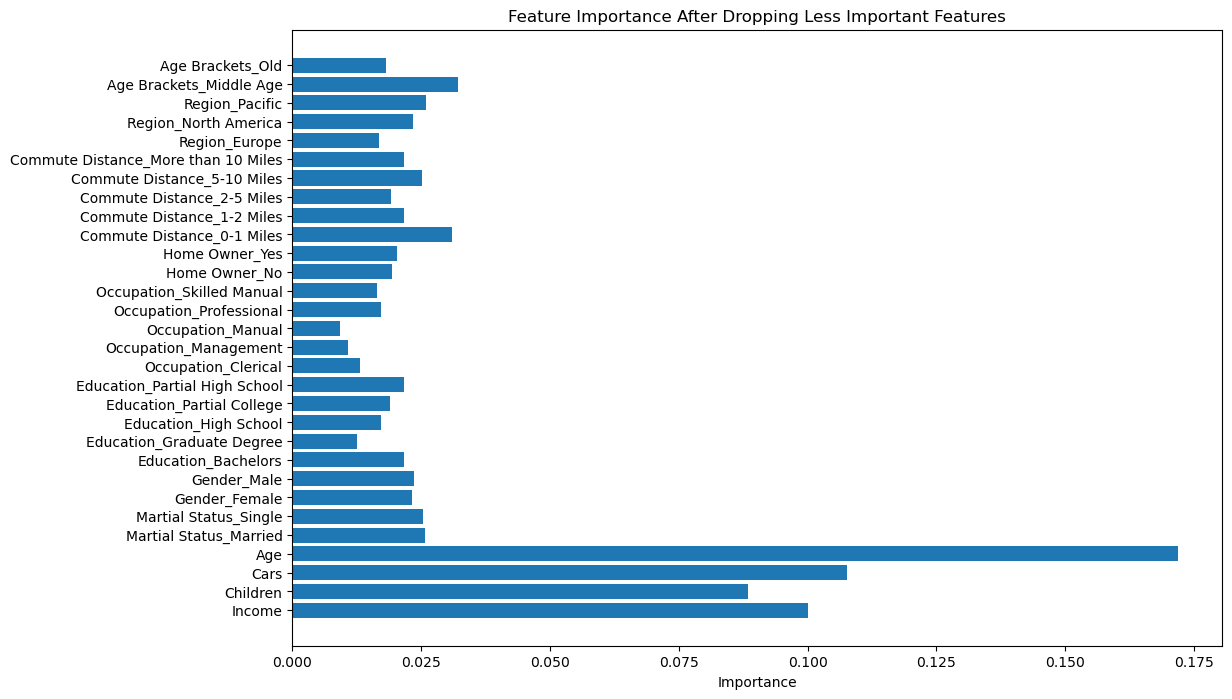

In [25]:
# Recalculate feature importances
importances_important = best_rf_model.feature_importances_

# Plot feature importances for important features
plt.figure(figsize=(12, 8))
plt.barh(selected_features, importances_important)
plt.xlabel('Importance')
plt.title('Feature Importance After Dropping Less Important Features')
plt.show()
